##### Week 7 - Descriptive Analytics with Data Visualization
sort_index()inplace=true) ,apply vs transform
len,count v size
plot => continuos discret category numeric axis values , covariance corerealtion
python vs matplotlib
reindex => to sort by custom sort Categorical

In [12]:
import pandas as pd
import numpy as np
#plot
from matplotlib import pyplot as plt

df = pd.read_csv("ChallengerSales.csv")

# Add a new column 'AvecostItem', which represents the totala cost of a trasaction / the items ordered in that transaction
df['AvecostItem'] = df['TotalCost']/df['ItemsOrdered']

df.head(10)

,Date,Day,Time,Gender,BuyCategory,ItemsOrdered,TotalCost,HighItem,Member,Region,AvecostItem
0,6-Mar,Mon,Morning,Female,High,4,136.97,79.97,Yes,West,34.2425
1,6-Mar,Mon,Morning,Female,Medium,1,25.55,25.55,No,West,25.5500
2,6-Mar,Mon,Afternoon,Female,Medium,5,113.95,90.47,Yes,West,22.7900
3,6-Mar,Mon,Afternoon,Female,Low,1,6.82,6.82,No,East,6.8200
4,6-Mar,Mon,Afternoon,Male,Medium,4,147.32,83.21,Yes,West,36.8300
5,6-Mar,Mon,Afternoon,Female,Medium,5,142.15,50.90,No,East,28.4300
6,7-Mar,Tues,Evening,Male,Low,1,18.65,18.65,No,West,18.6500
7,7-Mar,Tues,Evening,Male,High,4,178.34,161.93,No,South,44.5850
8,7-Mar,Tues,Evening,Male,Low,2,25.83,15.91,No,West,12.9150
9,8-Mar,Wed,Morning,Female,Low,1,18.13,18.13,No,Central,18.1300


In [2]:
ItemsOrdered1 = df['ItemsOrdered'].value_counts()
ItemsOrdered1.sort_index(inplace=True)# index is ItemsOrdered colum , next is count
print(ItemsOrdered1)
#df.groupby(['Day']).size() # => help count of group items


1     60
2     95
3     75
4     72
5     35
6     26
7     18
8      8
9      8
10     2
11     1
Name: ItemsOrdered, dtype: int64


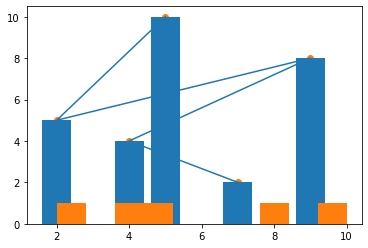

In [3]:
#PLOT

x = [5, 2, 9, 4, 7]  # x-axis values 
y = [10, 5, 8, 4, 2]  # Y-axis values 

plt.bar(x,y) # Function to bar 
# Function to plot 
plt.plot(x,y) 
# Function to plot scatter 
plt.scatter(x, y) 
# Function to plot histogram single values 
plt.hist(y) 
plt.show()  # function to show the plot 

In [4]:

categories=['Mon','Tues','Wed','Thurs','Fri','Sat', 'Sun']
df_day_order = df.groupby(['Day'])["ItemsOrdered"].sum().reindex(categories).reset_index()
type(df_day_order)
print(df_day_order[["Day","ItemsOrdered"]])


     Day  ItemsOrdered
0    Mon           213
1   Tues           198
2    Wed           136
3  Thurs           175
4    Fri           236
5    Sat           328
6    Sun           101


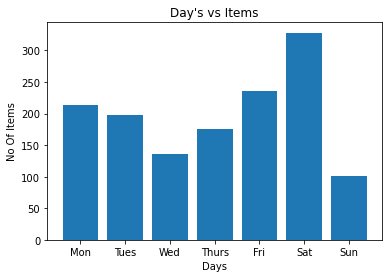

In [5]:
#plt
plt.bar(df_day_order["Day"],df_day_order["ItemsOrdered"])
plt.xlabel("Days")
plt.ylabel("No Of Items")
plt.title("Day's vs Items")
plt.show()

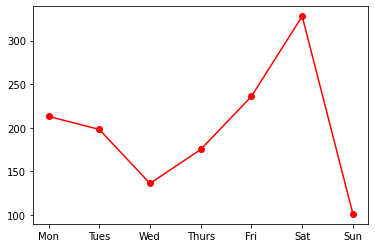

In [6]:
fig,ax = plt.subplots() # another way to
ax.plot(df_day_order["Day"],df_day_order["ItemsOrdered"],marker='o',color='r')
plt.show()

      Day  Gender  ItemsOrdered
0     Fri  Female           166
1     Fri    Male            70
2     Mon  Female           144
3     Mon    Male            69
4     Sat  Female           151
5     Sat    Male           177
6     Sun  Female            51
7     Sun    Male            50
8   Thurs  Female           115
9   Thurs    Male            60
10   Tues  Female           127
11   Tues    Male            71
12    Wed  Female            73
13    Wed    Male            63


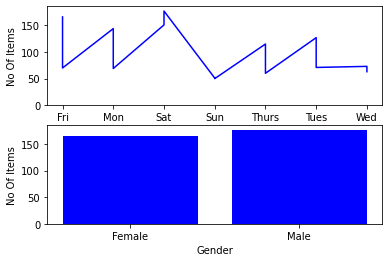

In [7]:
df_day_order = df.groupby(['Day','Gender'])["ItemsOrdered"].sum().reset_index()

print(df_day_order)
fig,ax = plt.subplots(2,1,sharey=True) # sharey
ax[0].plot(df_day_order["Day"],df_day_order["ItemsOrdered"],color='b')
ax[1].bar(df_day_order["Gender"],df_day_order["ItemsOrdered"],color='b')

ax[0].set_ylabel("No Of Items")
ax[0].set_xlabel("Days")
ax[1].set_ylabel("No Of Items")
ax[1].set_xlabel("Gender")

#plt.title("Day's vs Items")
plt.show()

Gender    Day  Female  Male
0         Fri     166    70
1         Mon     144    69
2         Sat     151   177
3         Sun      51    50
4       Thurs     115    60
5        Tues     127    71
6         Wed      73    63


Text(0.5, 0, 'Male')

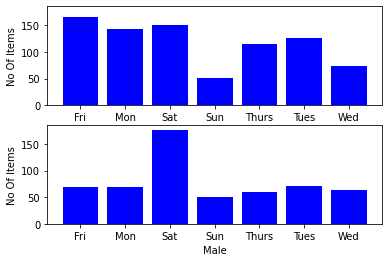

In [8]:
df_pvot = df_day_order.groupby(['Day','Gender'])["ItemsOrdered"].sum().unstack() # pivot alternative
df_n = df_pvot.reset_index(drop=False)
print(df_n)

fig,ax = plt.subplots(2,1,sharey=True) # sharey
ax[0].bar(df_n["Day"],df_n["Female"],color='b')
ax[1].bar(df_n["Day"],df_n["Male"],color='b')

ax[0].set_ylabel("No Of Items")
ax[0].set_xlabel("Female")
ax[1].set_ylabel("No Of Items")
ax[1].set_xlabel("Male")


Gender    Day  Female  Male
0         Fri     166    70
1         Mon     144    69
2         Sat     151   177
3         Sun      51    50
4       Thurs     115    60
5        Tues     127    71
6         Wed      73    63


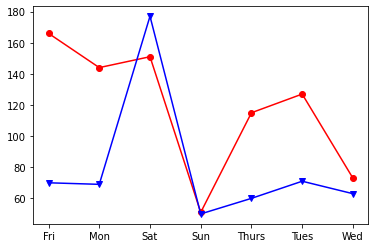

In [9]:
print(df_n)
fig,ax = plt.subplots() # another 
ax.plot(df_n["Day"],df_n["Female"],marker='o',color='r')
ax.plot(df_n["Day"],df_n["Male"],marker='v',color='b')
plt.show()

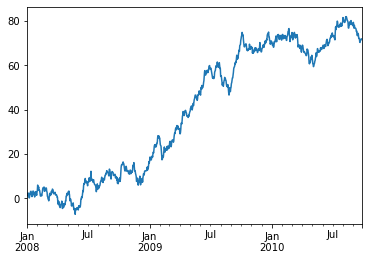

In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2008', periods=1000))
ts = ts.cumsum()
ts.plot()

,A,B,C,D
2008-01-01,-0.776008,0.130307,0.878134,-0.369930
2008-01-02,0.528160,2.024427,0.867654,-1.429308
2008-01-03,-0.220999,0.725371,-0.393284,-3.566491
2008-01-04,-2.077277,-0.299251,-1.784339,-3.192658
2008-01-05,-1.926123,-0.129030,-1.121803,-3.426158
...,...,...,...,...
2010-09-22,-6.315077,39.160424,-9.154113,8.625454
2010-09-23,-8.333856,39.487159,-7.885699,8.737466
2010-09-24,-9.099224,38.459126,-7.753097,8.570448
2010-09-25,-8.480831,36.310629,-7.707739,7.051262


<Figure size 432x288 with 0 Axes>

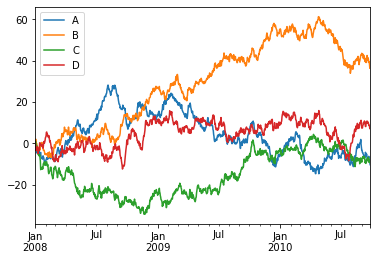

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')
df

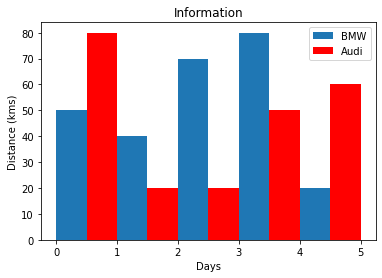

In [25]:
plt.bar([0.25,1.25,2.25,3.25,4.25],[50,40,70,80,20],
label="BMW",width=.5)
plt.bar([.75,1.75,2.75,3.75,4.75],[80,20,20,50,60],
label="Audi", color='r',width=.5)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Distance (kms)')
plt.title('Information')
plt.show()

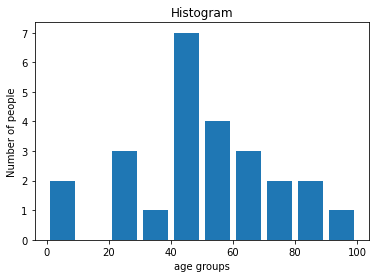

In [28]:
#Histograms are used to show a distribution whereas a bar chart is used to compare different entities. 
#Histograms are useful when you have arrays or a very long list. 
#Let’s consider an example where I have to plot the age of population with respect to bin. 
#Now, bin refers to the range of values that are divided into series of intervals. Bins are usually created of the same size. 
#In the below code, I have created the bins in the interval of 10 which means the first bin contains elements from 0 to 9, 
#then 10 to 19 and so on.
population_age = [22,55,62,45,21,22,34,42,42,4,2,102,95,85,55,110,120,70,65,55,111,115,80,75,65,54,44,43,42,48]
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(population_age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('age groups')
plt.ylabel('Number of people')
plt.title('Histogram')
plt.show()